读取被试数据，选择频带，沿频带方向取平均值--> (samples, 62)

In [11]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

person = '6_20130712'
band = 'beta'

t0_degree, t1_degree, t2_degree, all_degree = [], [], [], []

for cnt in range(1123):
    for label in range(3):
        try:
            adj_matrix = np.load(f'/data/Anaiis/garage/adj_matrix/{person}-{band}-adj_matrix{cnt}-{label}.npy')
        except:
            continue
        degree = adj_matrix.mean(axis=1)
        all_degree.append(degree[:])
        t0_degree.append(degree[:62])
        t1_degree.append(degree[62:124])
        t2_degree.append(degree[124:186])

# 转换为 numpy 数组
data_t0 = np.array(t0_degree)
data_t1 = np.array(t1_degree)
data_t2 = np.array(t2_degree)
data_all = np.array(all_degree)

data_combined = np.vstack([data_t0, data_t1, data_t2])


In [13]:
mean_chan_t0 = data_t0.mean(axis=0)
mean_chan_t1 = data_t1.mean(axis=0)
mean_chan_t2 = data_t2.mean(axis=0)

In [19]:
print(mean_chan_t0.max())
print(mean_chan_t1.max())
print(mean_chan_t2.max())

0.13544223934434063
0.18616228281204622
0.13399370446716447


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

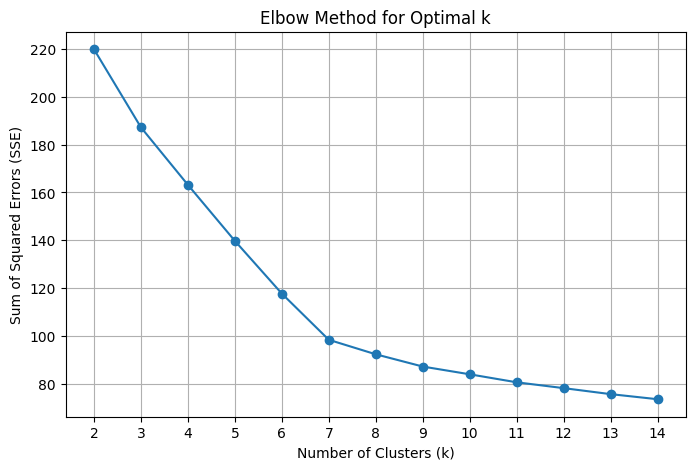

In [21]:
sse = []
k_range = range(2, 15) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=929)
    kmeans.fit(data_all)
    sse.append(kmeans.inertia_)  # 计算每个 k 的 SSE

# 绘制肘部图
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.grid()
plt.show()

In [25]:
n_clusters = 7  # 可以根据需要调整

# 创建一个 KMeans 聚类器并进行聚类
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_all)
centers = kmeans.cluster_centers_


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: >

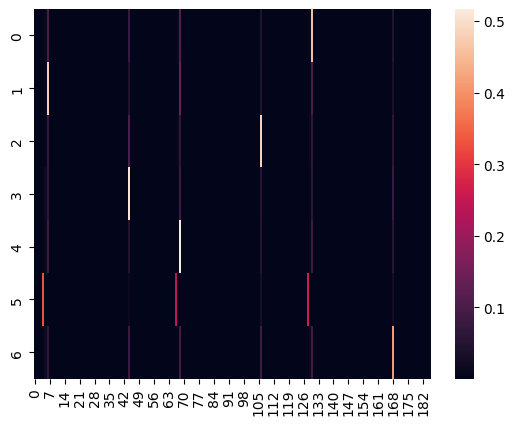

In [26]:
import seaborn as sns
sns.heatmap(centers)

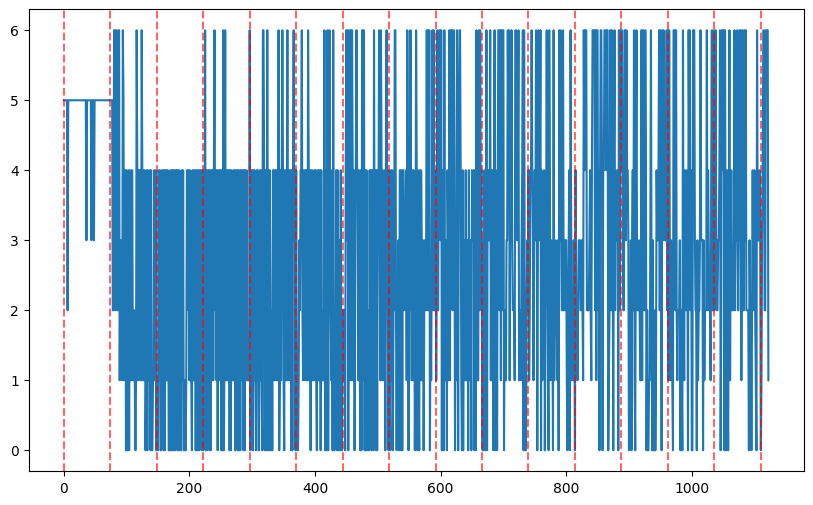

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cluster_labels)
for x in range(0, len(cluster_labels), 74):
    ax.axvline(x=x, color='red', linestyle='--', alpha=0.6)

# [1, 0, -1, -1, 0, 1, -1, 0, 1, 1, 0, -1, 0, 1, -1]

In [25]:
import torch
import numpy as np

data_feats = []
labels = []
for i in range(1056):
    fusion_feats = torch.load(f'/data/Anaiis/garage/vis_data/15_20131105/fusion_{i}.pt')
    fusion_feats = fusion_feats.cpu().numpy().mean(axis=0)
    data_feats.append(fusion_feats)
    label = torch.load(f'/data/Anaiis/garage/vis_data/15_20131105/labels_{i}.pt')
    label = label.cpu().numpy()
    labels.append(label)
data_feats = np.array(data_feats)
labels = np.array(labels).squeeze()
print(labels.shape)
print(data_feats.shape)

# cluster


(1056,)
(1056, 18)


In [22]:
raw_data = np.load(f'/data/Anaiis/Data/SEED/len_200/smooth_False/6_20130712/data.npy')
labels = np.load(f'/data/Anaiis/Data/SEED/len_200/smooth_False/6_20130712/label.npy')
raw_data.shape

(3394, 62, 5, 200)

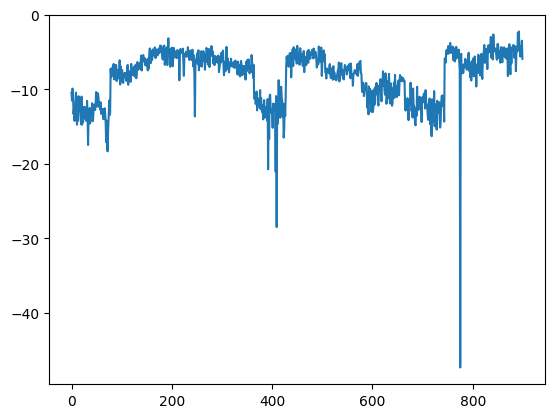

In [26]:
import matplotlib.pyplot as plt

plt.plot(data_feats.mean(axis=1)[:900])

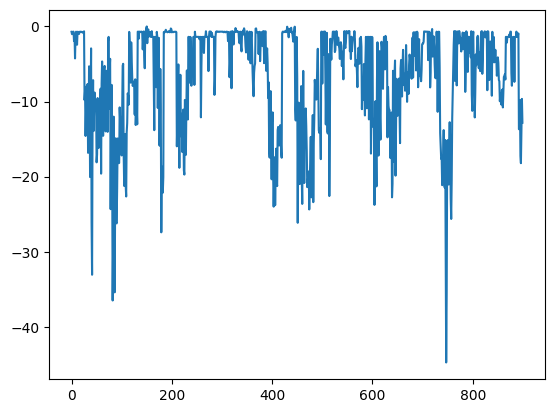

In [3]:
plt.plot(data_feats[:900, 0])

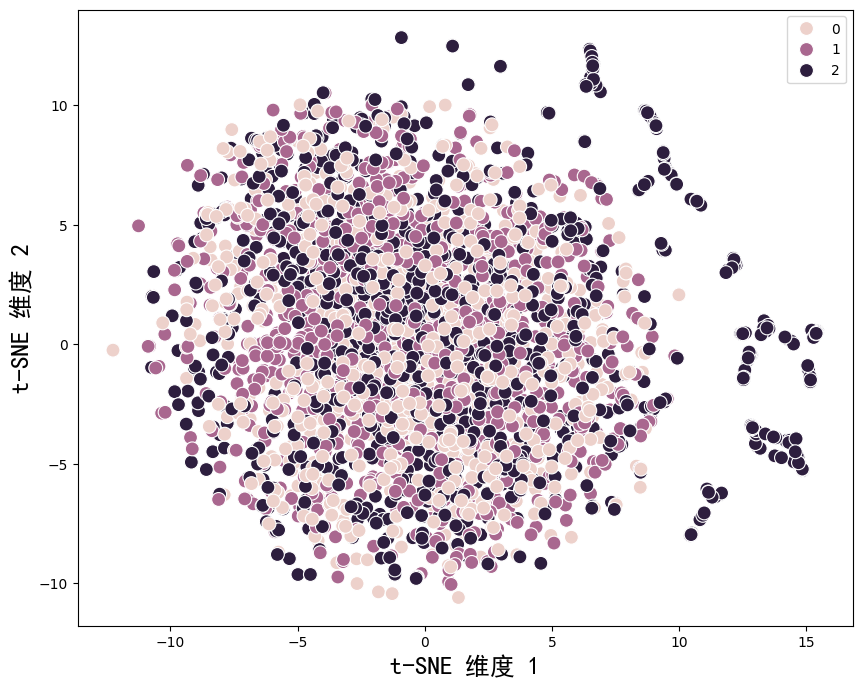

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

simhei_font = FontProperties(fname='./SimHei.ttf')
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(raw_data.reshape(3394, -1))

plt.figure(figsize=(10, 8))
# palette = sns.color_palette("hsv", 3)
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=labels, legend='full', s=100)
# plt.title(f'特征t-SNE', fontsize=18, fontproperties=simhei_font)
plt.xlabel('t-SNE 维度 1', fontsize=18, fontproperties=simhei_font)
plt.ylabel('t-SNE 维度 2', fontsize=18, fontproperties=simhei_font)
plt.savefig('./tsne-deap.pdf')
plt.show()


In [22]:
data_feats.shape

(1056, 20)

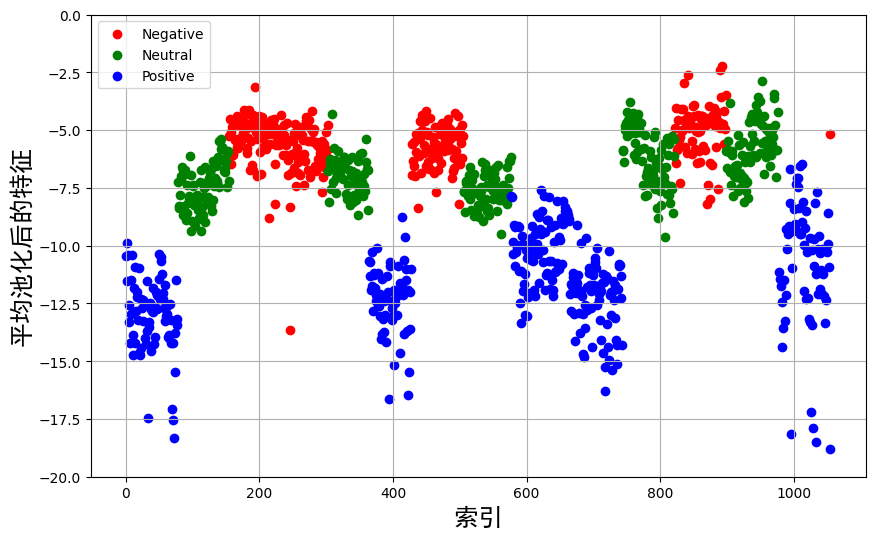

In [28]:
from matplotlib.font_manager import FontProperties

simhei_font = FontProperties(fname='./SimHei.ttf')
data = data_feats.mean(axis=1)
labels_plt = labels[:]
colors = ['red', 'green', 'blue']  # 您可以根据需要修改颜色
labels_dict = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

# 创建一个颜色数组，其中每个点的颜色根据其标签确定
point_colors = [colors[label] for label in labels]

# valid_indices = data > -15

# 绘制彩色散点图
plt.figure(figsize=(10, 6))
for label in np.unique(labels_plt):
    # 找到每个类别中有效的点
    indices = np.where((labels_plt == label) )
    plt.scatter(indices, data[indices], color=colors[label], label=labels_dict[label])


# plt.title('Colored Plot Based on Labels')
plt.xlabel('索引', fontsize=18, fontproperties=simhei_font)
plt.ylabel('平均池化后的特征', fontsize=18, fontproperties=simhei_font)
plt.ylim(-20, 0)
plt.grid(True)  # 添加网格线
plt.legend()  # 显示图例
plt.savefig('continuative-15_20131105.pdf')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


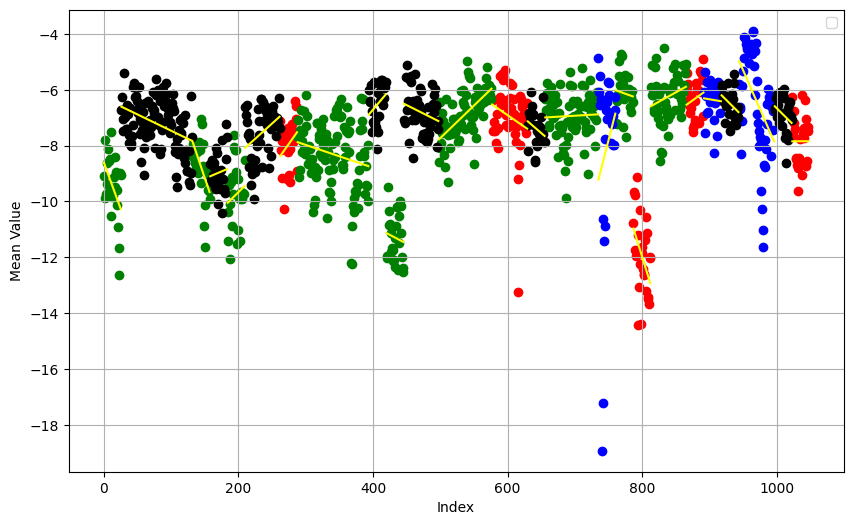

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

labels = labels[:]
data = data_feats.mean(axis=1)
colors = ['red', 'green', 'blue', 'black']
labels_dict = {0: 'LALV', 1: 'LAHV', 2: 'HALV', 3: 'HAHV'}

# 创建一个颜色数组，其中每个点的颜色根据其标签确定
point_colors = [colors[label] for label in labels]

# 绘制彩色散点图
plt.figure(figsize=(10, 6))

# 检测标签变化的地方，并分段回归
unique_labels = np.unique(labels)
for label, color in zip(unique_labels, colors):
    indices = np.where(labels == label)[0]
    # 检测连续段
    segments = np.split(indices, np.where(np.diff(indices) != 1)[0] + 1)
    
    for segment in segments:
        if len(segment) < 2:  # 至少需要两个点进行回归
            continue
        # 回归每个段
        poly = PolynomialFeatures(degree=1)
        segment_reshaped = segment.reshape(-1, 1)
        segment_poly = poly.fit_transform(segment_reshaped)

        model = LinearRegression()
        model.fit(segment_poly, data[segment])  # 拟合模型
        predicted_data = model.predict(segment_poly)  # 预测数据

        # 排序索引和预测值以确保线条平滑
        sorted_order = np.argsort(segment)
        plt.plot(segment[sorted_order], predicted_data[sorted_order], color='yellow')

        # 绘制散点
        plt.scatter(segment, data[segment], color=color)

plt.xlabel('Index')
plt.ylabel('Mean Value')
plt.grid(True)  # 添加网格线
plt.legend()  # 显示图例
plt.show()


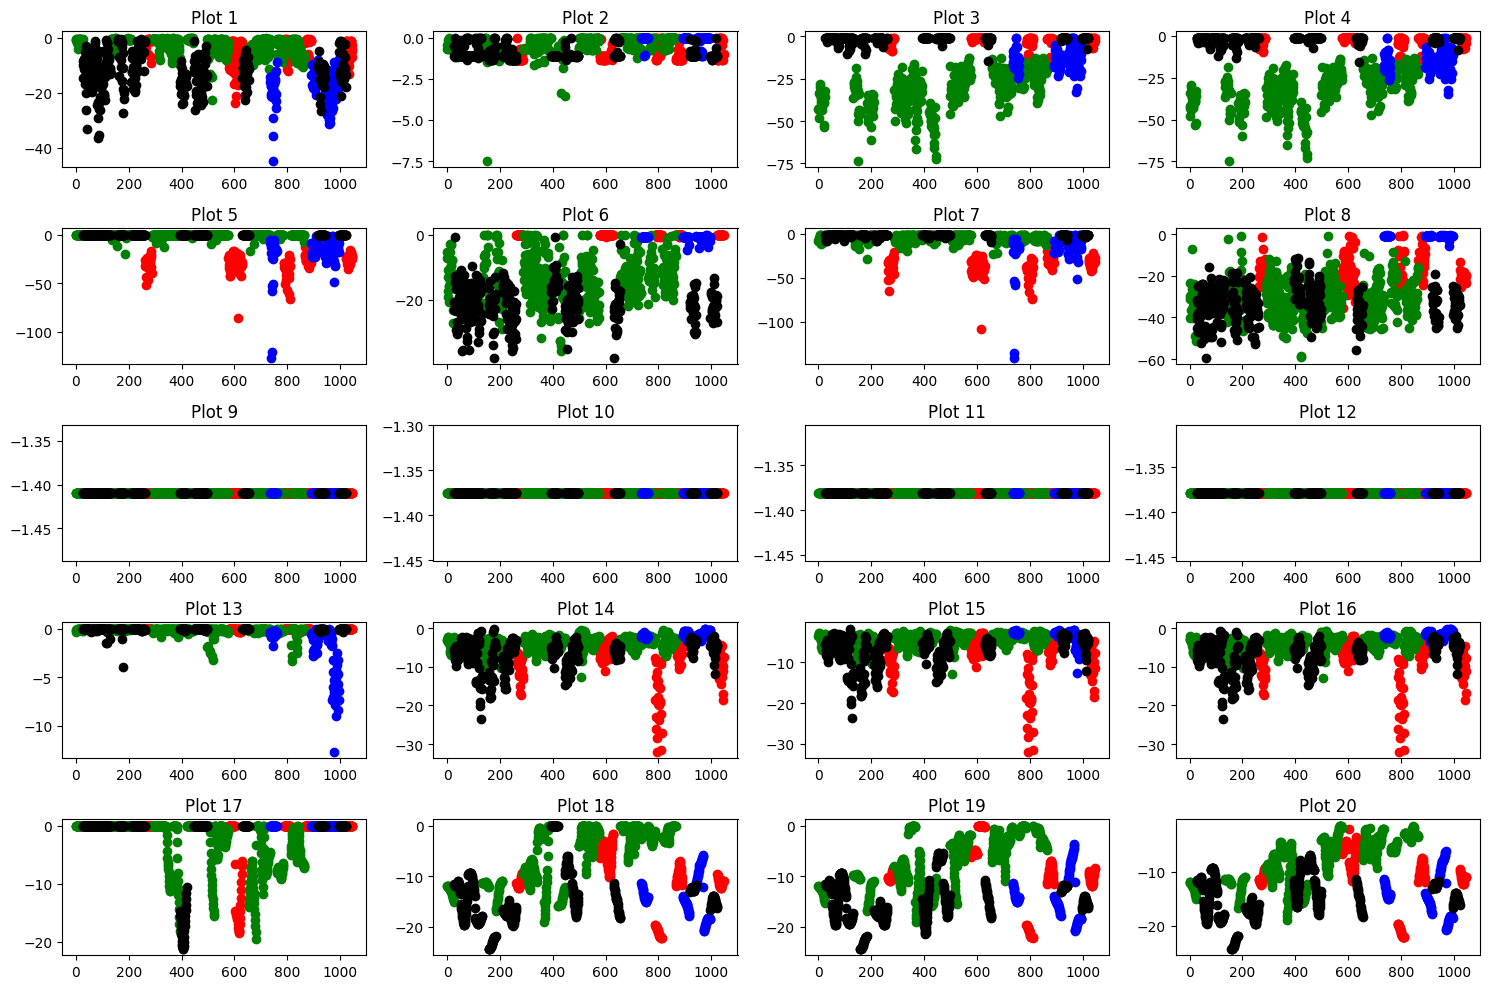

In [118]:
rows = 5
cols = 4

# 创建一个图形和一组子图
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))

labels_plt = labels[:]
colors = ['red', 'green', 'blue', 'black'] 
labels_dict = {0: 'LALV', 1: 'LAHV', 2: 'HALV', 3: 'HAHV'}

point_colors = [colors[label] for label in labels]

# 循环遍历所有子图
for i in range(rows):
    for j in range(cols):
        ax = axes[i, j]
        data = data_feats[:, i*cols+j]
        for label in np.unique(labels_plt):
            # 找到每个类别中有效的点
            indices = np.where((labels_plt == label) )
            ax.scatter(indices, data[indices], color=colors[label], label=labels_dict[label])
        ax.set_title(f'Plot {i*cols + j + 1}')
        # ax.grid(True)

# 调整每个子图的间距
plt.tight_layout()
plt.show()